<font size=3>代码基于https://github.com/HeroKillerEver/SeqGAN-Pytorch 和 https://github.com/isayev/ReLeaSE 的基础上修改</font><br/>
<font size=3>请按照https://github.com/isayev/ReLeaSE 上的环境配置</font><br/>


In [ ]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=0

一些超参数的设定，以及数据集的选取

In [ ]:
import os
import numpy as np
import argparse
from solver import Solver
import torch
gpus='0'
lr=0.0001
batch=64
vocab=44
pre_gen_epoch=10
pre_dis_epoch=3
gan_epoch=10
generate_num=10000
sequence_len=50
update_rate=0.85
os.environ['CUDA_VISIBLE_DEVICES'] = gpus
real_data = 'real.csv'
fake_data = 'fake.csv'
eval_data = 'eval.csv'
if not os.path.isdir('data'):
    os.makedirs('data')
real_file = os.path.join('data', real_data)
fake_file = os.path.join('data', fake_data)
eval_file = os.path.join('data', eval_data)

In [ ]:
class gendata:
    def __init__(self,cuda):
        self.all_characters =  ['|', 'C', '#', '%', ')', '(', '+', '-', '/', '.', '1', '0', '3', '2', '5', '4', '7',
          '6', '9', '8', '=', 'A', '@', 'B', 'F', 'I', 'H', 'O', 'N', 'P', 'S', '[', ']',
          '\\', 'c', 'e', 'i', 'l', 'o', 'n', 'p', 's', 'r', '<']
        self.use_cuda=cuda
    def char_tensor(self,string):
        """
        Converts SMILES into tensor of indices wrapped into torch.autograd.Variable.
        Args:
            string (str): input SMILES string
        Returns:
            tokenized_string (torch.autograd.Variable(torch.tensor))
        """
        tensor = torch.zeros(len(string)).long()
        for c in range(len(string)):
            tensor[c] = self.all_characters.index(string[c])
        if self.use_cuda:
            return torch.as_tensor(tensor).cuda()
        else:
            return torch.as_tensor(tensor)

生成模型设置

In [ ]:
from stackRNN import StackAugmentedRNN
hidden_size = 1500
stack_width =750#400
stack_depth = 100#70
layer_type = 'LSTM'
lr = lr
use_cuda = torch.cuda.is_available()
optimizer_instance = torch.optim.Adam

my_generator = StackAugmentedRNN(input_size=vocab, hidden_size=hidden_size,
                                 output_size=vocab, layer_type=layer_type,
                                 n_layers=1, is_bidirectional=False, has_stack=True,
                                 stack_width=stack_width, stack_depth=stack_depth, 
                                 use_cuda=use_cuda, 
                                 optimizer_instance=optimizer_instance, lr=lr)

seqGAN对抗网络设置

In [ ]:
solver = Solver(vocab, batch, pre_gen_epoch, pre_dis_epoch, 
                gan_epoch, generate_num, sequence_len, lr, 
                real_file, fake_file, eval_file, update_rate,my_generator)

<font size=5>训练过程</font>

In [85]:
# solver.pretrain_gen2()#generator_pretrainer
# torch.save(solver.generator.state_dict(), './model/generator/checkpoint_stack_rnn_ep25')

In [ ]:
path='./model/generator/checkpoint_stack_rnn_ep15+11'#model_path
# torch.save(solver.generator.state_dict(), './model/generator/checkpoint_stack_rnn_ep15')

In [ ]:
weights = torch.load(path)
solver.generator.load_state_dict(weights)#加载模型

In [18]:
# solver.pretrain_dis()#discriminator_pretrainer


Pretrain discriminator......
(9984, 50) (9984, 50)
epoch: [0], loss: [0.0123]
(9984, 50) (9984, 50)
epoch: [1], loss: [0.0122]
(9984, 50) (9984, 50)
epoch: [2], loss: [0.0120]


In [8]:
path = './model/discriminator/checkpoint_cnn_eq11+14'#1500 1500 2

In [9]:
weights = torch.load(path)
solver.discriminator.load_state_dict(weights)

<All keys matched successfully>

In [10]:
# GAN Training
# backend = 'cpu' if gpus == '' else 'gpu'
# loss_list = solver.train_gan(backend)


Start Adeversatial Training......


C:\ProgramData\Miniconda3\envs\drug\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\ProgramData\Miniconda3\envs\drug\lib\site-packages\torch\nn\modules\rnn.py:774: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:968.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,
C:\ProgramData\Miniconda3\envs\drug\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\ProgramData\Miniconda3\envs\drug\lib\site-packag

generator updated via policy gradient...... 
 loss_generator: 0.1177377700805664
(9984, 50) (9984, 50)
discriminator updated via gan loss...... 
 loss_discriminator: 0.010543130154793079
time: [2279.144s/epoch] in gpu
generator updated via policy gradient...... 
 loss_generator: 0.12320637702941895
(9984, 50) (9984, 50)
discriminator updated via gan loss...... 
 loss_discriminator: 0.010456044440850234
time: [2333.803s/epoch] in gpu
generator updated via policy gradient...... 
 loss_generator: 0.15329550206661224
(9984, 50) (9984, 50)
discriminator updated via gan loss...... 
 loss_discriminator: 0.010470719087200287
time: [2339.280s/epoch] in gpu
generator updated via policy gradient...... 
 loss_generator: 0.1500232219696045
(9984, 50) (9984, 50)
discriminator updated via gan loss...... 
 loss_discriminator: 0.010214388286456084
time: [2337.071s/epoch] in gpu
generator updated via policy gradient...... 
 loss_generator: 0.12245066463947296
(9984, 50) (9984, 50)
discriminator updated 

<font size=5>评价模型</font>

输出判别器对realfile和fake_file的判断

In [23]:
import os,util
from util import GenData, DisData
from torch.utils.data import DataLoader
real_data = 'real.csv'
fake_data = 'fake.csv'
real_file = os.path.join('data', real_data)
fake_file = os.path.join('data', fake_data)
dis_data = DisData(real_file,fake_file)
dis_data_loader = DataLoader(dis_data, batch_size=64, shuffle=True, num_workers=8)
count = 0
for i, (data, target) in enumerate(dis_data_loader):
    x, y = util.to_var(data), util.to_var(target) 
    re=solver.discriminator(x)
    for k in range(64):
        flag = 0
        print(re[k],y[k])
        if re[k].item()<=0:
            # print(re[k].item(),y[k].item())
            flag = 0
            if flag == int(y[k].item()):
                count += 1
        else:
            flag = 1
            if flag == int(y[k].item()):
                count += 1

print(count)

(9984, 50) (9984, 50)
tensor([-1.4498], device='cuda:0', grad_fn=<SelectBackward0>) tensor([1.], device='cuda:0')
tensor([0.7295], device='cuda:0', grad_fn=<SelectBackward0>) tensor([1.], device='cuda:0')
tensor([0.4809], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.], device='cuda:0')
tensor([-1.3067], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.], device='cuda:0')
tensor([-0.7784], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.], device='cuda:0')
tensor([-2.0824], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.], device='cuda:0')
tensor([-0.0195], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.], device='cuda:0')
tensor([-0.0498], device='cuda:0', grad_fn=<SelectBackward0>) tensor([1.], device='cuda:0')
tensor([1.1101], device='cuda:0', grad_fn=<SelectBackward0>) tensor([1.], device='cuda:0')
tensor([1.0373], device='cuda:0', grad_fn=<SelectBackward0>) tensor([1.], device='cuda:0')
tensor([-0.8532], device='cuda:0', grad_fn=<SelectBackward0>) 

生成器生成totalnum条smiles

In [ ]:
import util
import numpy as np
gen_data=gendata(use_cuda)
smiles=[]
totalnum=100
for l in range(totalnum):
    smile=solver.generator.evaluate(gen_data,prime_str='<',end_token='|',predict_len=50)
    #print(smile)
    end_index=-1
    for i in range(1,len(smile)):
        if smile[i]=='|':
            end_index=i
            break
    if end_index==-1:
        smiles.append(smile[1:])
    else:
        smiles.append(smile[1:end_index])
# print(smiles)

有效性，独一性，新颖性评判

In [25]:
a,vaild_smiles,c=util.get_fp(smiles)#valid_smiles
sanitized=util.canonical_smiles(smiles, sanitize=True, throw_warning=False)[:-1]
unique_smiles = list(np.unique(sanitized))[1:]
print("共生成{}条smiles条smiles，其中{}条有效，在有效的smiles中{}条不重复".format(totalnum,len(vaild_smiles),len(unique_smiles)))

[23:04:00] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 20 21 22
[23:04:00] SMILES Parse Error: ring closure 2 duplicates bond between atom 11 and atom 12 for input: 'CCCC(=O)NCCc1ccc2c(c1CCC(=O)O)-2'
[23:04:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 19 20
[23:04:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
[23:04:00] SMILES Parse Error: unclosed ring for input: 'COC1(C2C=CCC3c4ccccc4Cc4ccccc42)OC1(C)C'
[23:04:00] Can't kekulize mol.  Unkekulized atoms: 0 1 2 8 9 10 11 12 13 19 20
[23:04:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[23:04:00] SMILES Parse Error: extra open parentheses while parsing: CCOP(=O)(OCCCl)CCCOc1ccc(-c2nc(Cl)nc3sc(-c4ccco4)c
[23:04:00] SMILES Parse Error: check for mistakes around position 25:
[23:04:00] (=O)(OCCCl)CCCOc1ccc(-c2nc(Cl)nc3sc(-c4cc
[23:04:00] ~~~~~~~~~~~~~~~~~~~~^
[23:04:00] SMILES Parse Error: Failed parsing SMILES 'CCOP(=O)(OCCCl)CCCOc1ccc(-c2nc(Cl)nc3sc(-c4ccco4)c' for input: 'CCOP(=O)(OCCCl)

共生成10000条smiles条smiles，其中8069条有效，在有效的smiles中7330条不重复


[23:04:04] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[23:04:04] SMILES Parse Error: unclosed ring for input: 'Nc1nc(N)c2c([nH]3cc(Cl)c(Cl)cc3c3ccc(Cl)cc13)c1ccc'
[23:04:04] SMILES Parse Error: unclosed ring for input: 'C=CCN1CC[C@@H]2c3ccn(CO)c(c3c3)C[C@H]1N2'
[23:04:04] SMILES Parse Error: unclosed ring for input: 'CC1(C)C=C(C(=O)NC(=O)N(CCCCCCCCOc2ccccc2)CC1)Nc1cc'
[23:04:04] Can't kekulize mol.  Unkekulized atoms: 11 12 25
[23:04:04] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 15 16
[23:04:04] Can't kekulize mol.  Unkekulized atoms: 2 3 4 13 14
[23:04:04] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 20
[23:04:04] SMILES Parse Error: extra open parentheses while parsing: O=[N+]([O-])c1cccc(-c2ncsc2-c2cn(COC(CO)CCl)c[nH]2
[23:04:04] SMILES Parse Error: check for mistakes around position 19:
[23:04:04] O=[N+]([O-])c1cccc(-c2ncsc2-c2cn(COC(CO)C
[23:04:04] ~~~~~~~~~~~~~~~~~~^
[23:04:04] SMILES Parse Error: Failed parsing SMILES 'O=[N+]([O-])c1cccc(-c2ncsc2

计算新颖性

In [26]:
import os
import util
from util import GenData, DisData
from torch.utils.data import DataLoader
all_characters =   ['|', 'C', '#', '%', ')', '(', '+', '-', '/', '.', '1', '0', '3', '2', '5', '4', '7',
          '6', '9', '8', '=', 'A', '@', 'B', 'F', 'I', 'H', 'O', 'N', 'P', 'S', '[', ']',
          '\\', 'c', 'e', 'i', 'l', 'o', 'n', 'p', 's', 'r', '<']
real_data = 'real.csv'
real_file = os.path.join('data', real_data)
real_data = np.genfromtxt(real_file, dtype='int', delimiter=',')
real_data=real_data.tolist()
novelnum=0
for i in range(len(unique_smiles)):
    smile=unique_smiles[i]
    B=[]
    if(len(smile)==0):
        continue
    for _ in range(len(smile),50):
        smile+="|"
    for c in range(len(smile)):
        B.append(all_characters.index(smile[c]))
    #print(B,len(B))
    if B not in real_data:
        novelnum+=1
print("未在real_data数据集中出现的smiles数为{}".format(novelnum))

未在real_data数据集中出现的smiles数为6677


SAscore评分判定

In [27]:
import math
import pickle
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import os
import os.path as op
 
#get_sa_score start
_fscores = None
 
def readFragmentScores(name='fpscores'):
    import gzip
    global _fscores
    # generate the full path filename:
    if name == "fpscores":
        name = op.join(os.getcwd(), name)
        # name = op.join(op.dirname(__file__), name)
    data = pickle.load(gzip.open('%s.pkl.gz' % name))
    outDict = {}
    for i in data:
        for j in range(1, len(i)):
            outDict[i[j]] = float(i[0])
    _fscores = outDict
 
 
def numBridgeheadsAndSpiro(mol, ri=None):
    nSpiro = rdMolDescriptors.CalcNumSpiroAtoms(mol)
    nBridgehead = rdMolDescriptors.CalcNumBridgeheadAtoms(mol)
    return nBridgehead, nSpiro
def calculateScore(m):
    if _fscores is None:
        readFragmentScores()
 
    # fragment score
    fp = rdMolDescriptors.GetMorganFingerprint(m,2)  # <- 2 is the *radius* of the circular fingerprint
    fps = fp.GetNonzeroElements()
    score1 = 0.
    nf = 0
    for bitId, v in fps.items():
        nf += v
        sfp = bitId
        score1 += _fscores.get(sfp, -4) * v
    score1 /= nf
 
    # features score
    nAtoms = m.GetNumAtoms()
    nChiralCenters = len(Chem.FindMolChiralCenters(m, includeUnassigned=True))
    ri = m.GetRingInfo()
    nBridgeheads, nSpiro = numBridgeheadsAndSpiro(m, ri)
    nMacrocycles = 0
    for x in ri.AtomRings():
        if len(x) > 8:
            nMacrocycles += 1
 
    sizePenalty = nAtoms**1.005 - nAtoms
    stereoPenalty = math.log10(nChiralCenters + 1)
    spiroPenalty = math.log10(nSpiro + 1)
    bridgePenalty = math.log10(nBridgeheads + 1)
    macrocyclePenalty = 0.
    # ---------------------------------------
    # This differs from the paper, which defines:
    # macrocyclePenalty = math.log10(nMacrocycles+1)
    # This form generates better results when 2 or more macrocycles are present
    if nMacrocycles > 0:
        macrocyclePenalty = math.log10(2)
 
    score2 = 0. - sizePenalty - stereoPenalty - spiroPenalty - bridgePenalty - macrocyclePenalty
 
    # correction for the fingerprint density
    # not in the original publication, added in version 1.1
    # to make highly symmetrical molecules easier to synthetise
    score3 = 0.
    if nAtoms > len(fps):
        score3 = math.log(float(nAtoms) / len(fps)) * .5
 
    sascore = score1 + score2 + score3
 
    # need to transform "raw" value into scale between 1 and 10
    min = -4.0
    max = 2.5
    sascore = 11. - (sascore - min + 1) / (max - min) * 9.
    # smooth the 10-end
    if sascore > 8.:
        sascore = 8. + math.log(sascore + 1. - 9.)
    if sascore > 10.:
        sascore = 10.0
    elif sascore < 1.:
        sascore = 1.0
 
    return sascore
def my_score(mols:list,score):
    readFragmentScores("fpscores")
    #print('smiles\tsa_score')
    sum=0
    for m in mols:
        s = calculateScore(m)
        score.append(s)
        #smiles = Chem.MolToSmiles(m)
        #print(smiles + "\t" + "\t%3f" % s)
        sum+=s
    return sum/len(mols)
score=[]#用来保存生成的smiles的sascore
mols=[]
for i in range(len(unique_smiles)):
    mol=Chem.MolFromSmiles(unique_smiles[i])
    if mol is not None:
        mols.append(mol)
print("平均SAS得分"+str(my_score(mols,score)))

[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerator
[23:18:13] DEPRECATION WARNING: please use MorganGenerat

平均SAS得分2.605089225293982


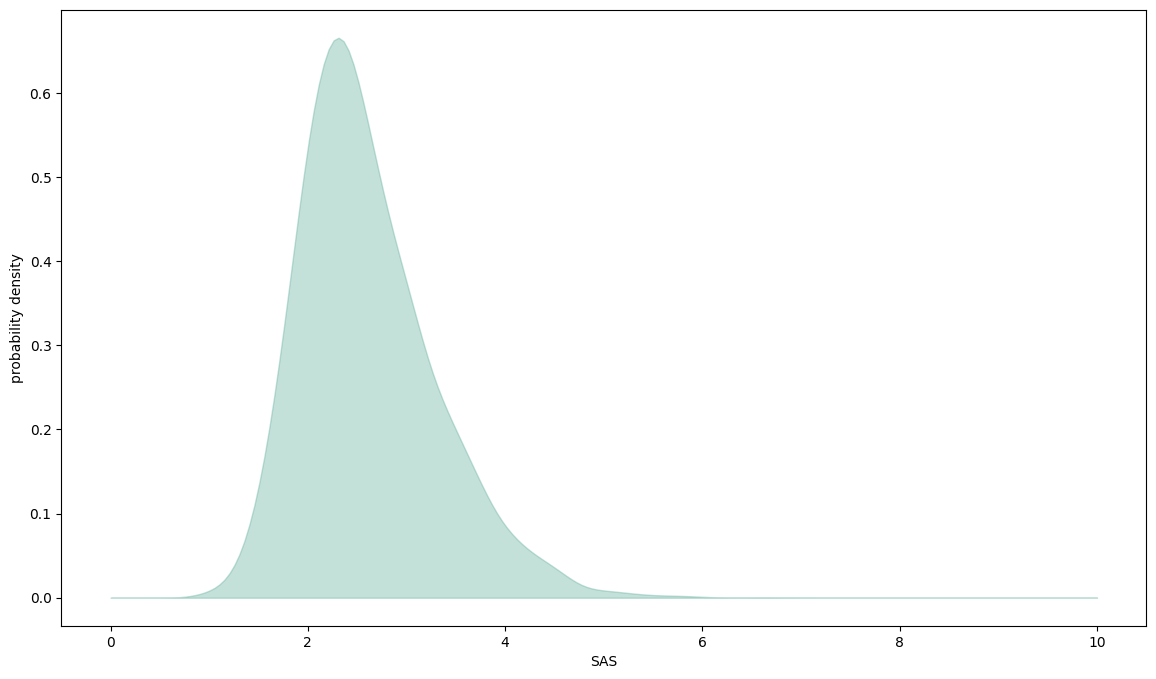

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
density = gaussian_kde(score)
density.covariance_factor = lambda : .25
density._compute_covariance()
# Create a vector of 200 values going from 0 to 8:
xs = np.linspace(0, 10, 200)
# Set the figure size
# Set the figure size
plt.figure(figsize=(14,8))

# plot
plt.fill_between( xs, density(xs), color="#69b3a2", alpha=0.4)

# title
#plt.title("SAS", loc='center', fontsize=18)
#plt.title("python graph gallery", loc='right', fontsize=13, color='grey', style='italic')

# Axis name
plt.xlabel("SAS")
plt.ylabel("probability density")
# Remove Y axis
#plt.yticks([])
#print(len(unique_smiles))
plt.show()

计算QED

In [29]:
from rdkit.Chem import QED
from rdkit import Chem
qed=[]#QED得分
pros=[]#计算RO5
sum=0
num=0
for i in range(len(unique_smiles)):
    mol=Chem.MolFromSmiles(unique_smiles[i])
    try:
        s=QED.default(mol)
        pro=QED.properties(mol)
    except:
        #print("1",end='')
        continue
    #print(unique_smiles[i])
    sum+=s
    num+=1
    qed.append(s)
    pros.append(pro)
print("共有"+str(num)+"条smiles计算qed")
print("qed平均得分"+str(sum/num))

共有7330条smiles计算qed
qed平均得分0.6670019593491155


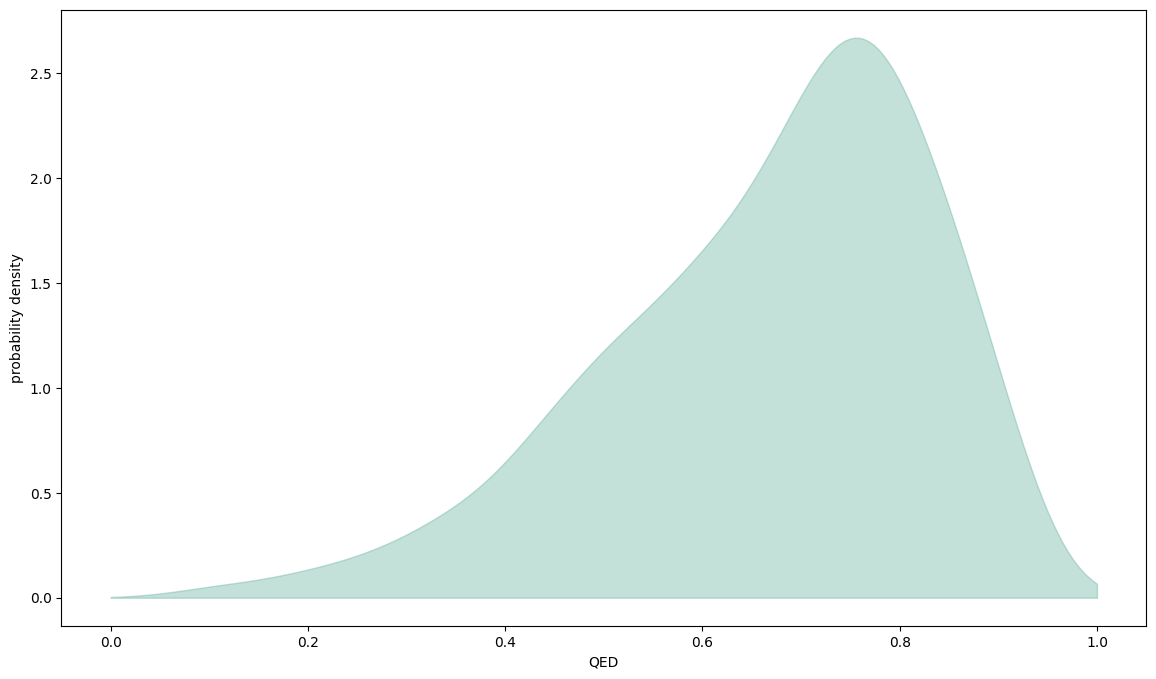

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
density = gaussian_kde(qed)
density.covariance_factor = lambda : .25
density._compute_covariance()
# Create a vector of 200 values going from 0 to 8:
xs = np.linspace(0, 1, 200)
# Set the figure size
# Set the figure size
plt.figure(figsize=(14,8))

# plot
plt.fill_between( xs, density(xs), color="#69b3a2", alpha=0.4)

# title
#plt.title("SAS", loc='center', fontsize=18)
#plt.title("python graph gallery", loc='right', fontsize=13, color='grey', style='italic')

# Axis name
plt.xlabel("QED")
plt.ylabel("probability density")
# Remove Y axis
#plt.yticks([])
#print(len(unique_smiles))
plt.show()

计算RO5

In [31]:
rule=[0,0,0,0,0]
for i in range(len(pros)):
    weifan=0
    if pros[i].MW>500:
        weifan+=1
    if pros[i].ALOGP>5:
        weifan+=1
    if pros[i].HBA>=10:
        weifan+=1
    if pros[i].HBD>=5:
        weifan+=1
    rule[weifan]+=1
print("没有违反RO5:"+str(rule[0]))
print("违反RO5中的一条:"+str(rule[1]))
print("违反RO5中的两条以及以上:"+str(len(pros)-rule[1]-rule[0]))

没有违反RO5:6648
违反RO5中的一条:661
违反RO5中的两条以及以上:21


制图

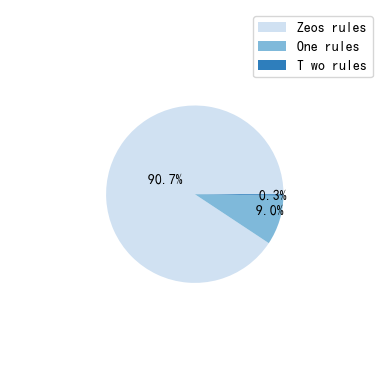

In [32]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False
x = [rule[0], rule[1], len(pros)-rule[0]-rule[1]]

colors = plt.get_cmap('Blues')(np.linspace(0.2,0.7,len(x)))
plt.pie(x,colors=colors,autopct='%10.1f%%',radius=0.6)
plt.legend(labels=['Zeos rules','One rules','T wo rules'],loc='best')

生成smiles展示

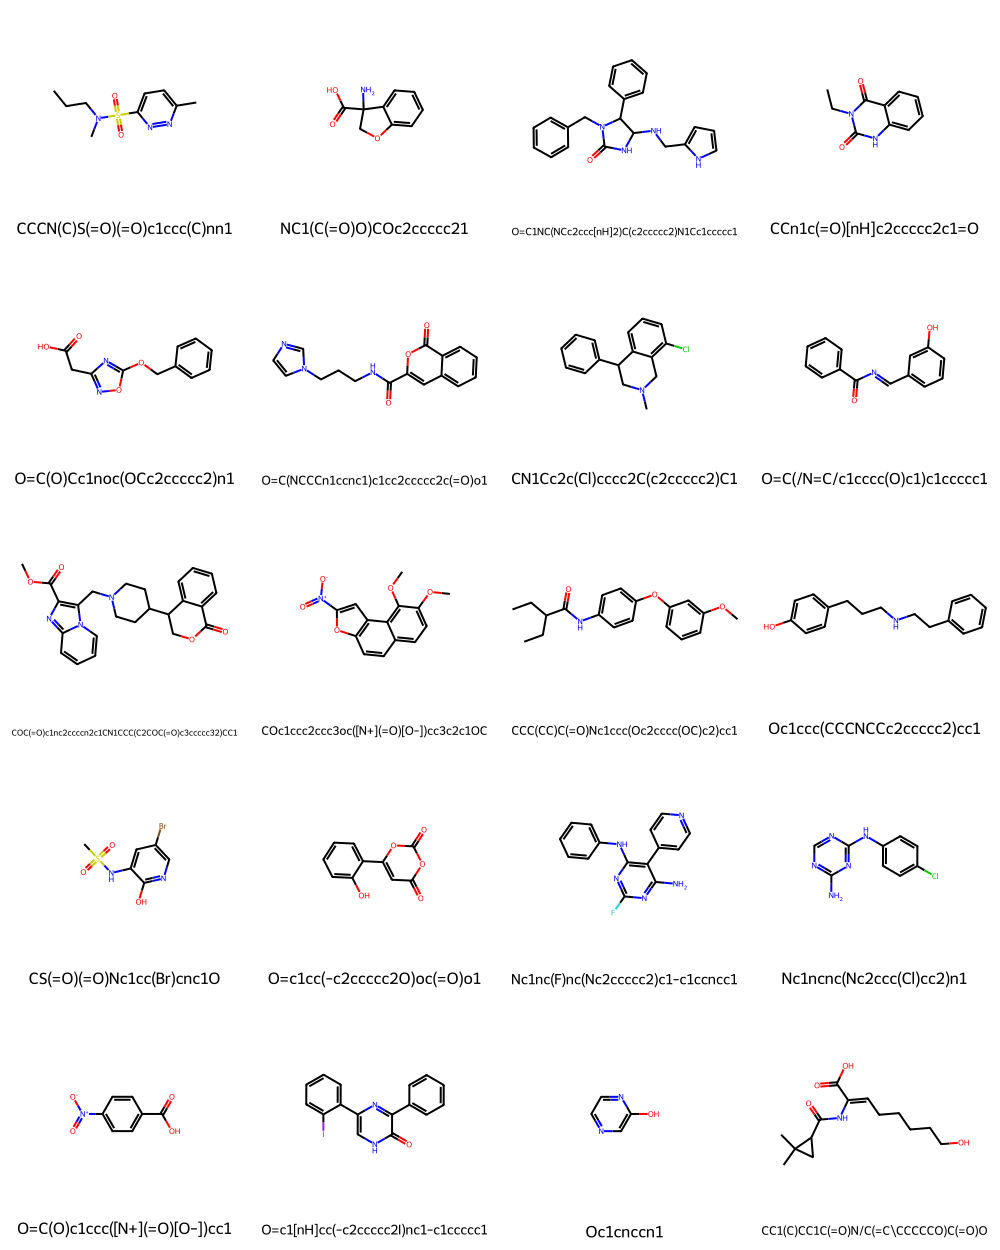

In [34]:
# from rdkit import Chem
# from rdkit.Chem.Draw import DrawingOptions
# from rdkit.Chem import Draw
# DrawingOptions.atomLabelFontSize = 50
# DrawingOptions.dotsPerAngstrom = 100
# DrawingOptions.bondLineWidth = 3
# generated_mols = [Chem.MolFromSmiles(sm, sanitize=True) for sm in unique_smiles]
# sanitized_gen_mols= [generated_mols[i]
#                           for i in np.where(np.array(generated_mols) != None)[0]]
# n_to_draw = 20
# ind = np.random.randint(0, len(sanitized_gen_mols), n_to_draw)
# mols_to_draw_min = [sanitized_gen_mols[i] for i in ind]
# legends = [str(unique_smiles[i]) for i in ind]
# Draw.MolsToGridImage(mols_to_draw_min, molsPerRow=4,
#                      subImgSize=(300,300), legends=legends)
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np

# 生成有效分子列表
valid_mols = [mol for mol in (Chem.MolFromSmiles(sm) for sm in unique_smiles) if mol is not None]

# 随机选择最多20个分子显示
mols_to_display = np.random.choice(valid_mols, size=min(20, len(valid_mols)), replace=False)

# 直接显示分子（自动适应Jupyter/控制台）
display(Draw.MolsToGridImage(
    mols_to_display,
    molsPerRow=4,
    subImgSize=(250, 250),
    legends=[Chem.MolToSmiles(mol) for mol in mols_to_display]
))
